In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

In [4]:
data_df = pd.read_csv('data.csv')
data_df

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No
...,...,...,...,...,...,...,...,...,...,...
995,Dark Theme,0.282792,0.401605,0.200720,68.478822,25,Kolkata,321,Yes,Yes
996,Dark Theme,0.299917,0.026372,0.762641,73.019821,38,Chennai,1635,Yes,Yes
997,Light Theme,0.370254,0.019838,0.607136,33.963298,32,Bangalore,1237,No,Yes
998,Light Theme,0.095815,0.137953,0.458898,37.429284,24,Chennai,893,Yes,No


Bi-variant Analysis

In [53]:
def plot_boxx(col: str):
    ax = sns.boxplot(x='Theme', y=col, data=data_df,hue='Theme')
    return ax

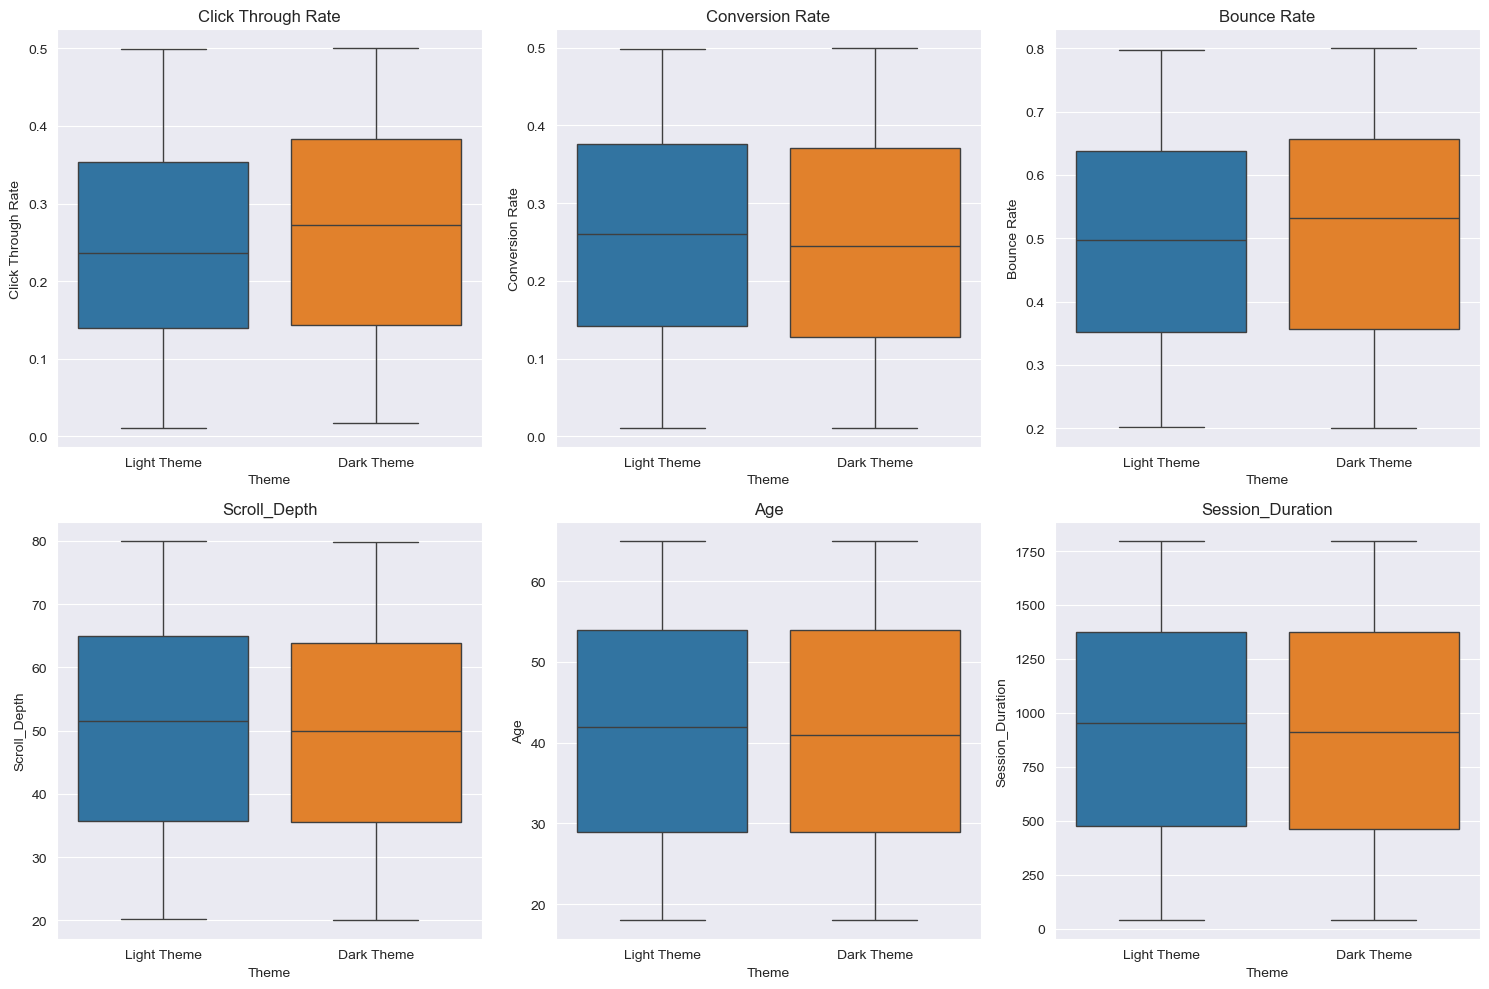

In [54]:
numeric_cols = data_df.select_dtypes(exclude='object').columns
num_plots = len(numeric_cols)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    plt.sca(axes[i])
    plot_boxx(col)
    axes[i].set_title(col)


plt.tight_layout()
plt.show()


So clearly theme seem to affect click through rate and bounce rate 
Users with dark theme seem to have higher click through rate and a higher bouce rate on average 

In [57]:
def plot_hist(col: str):
    ax = sns.histplot(x=col,data=data_df,bins=20)
    return ax

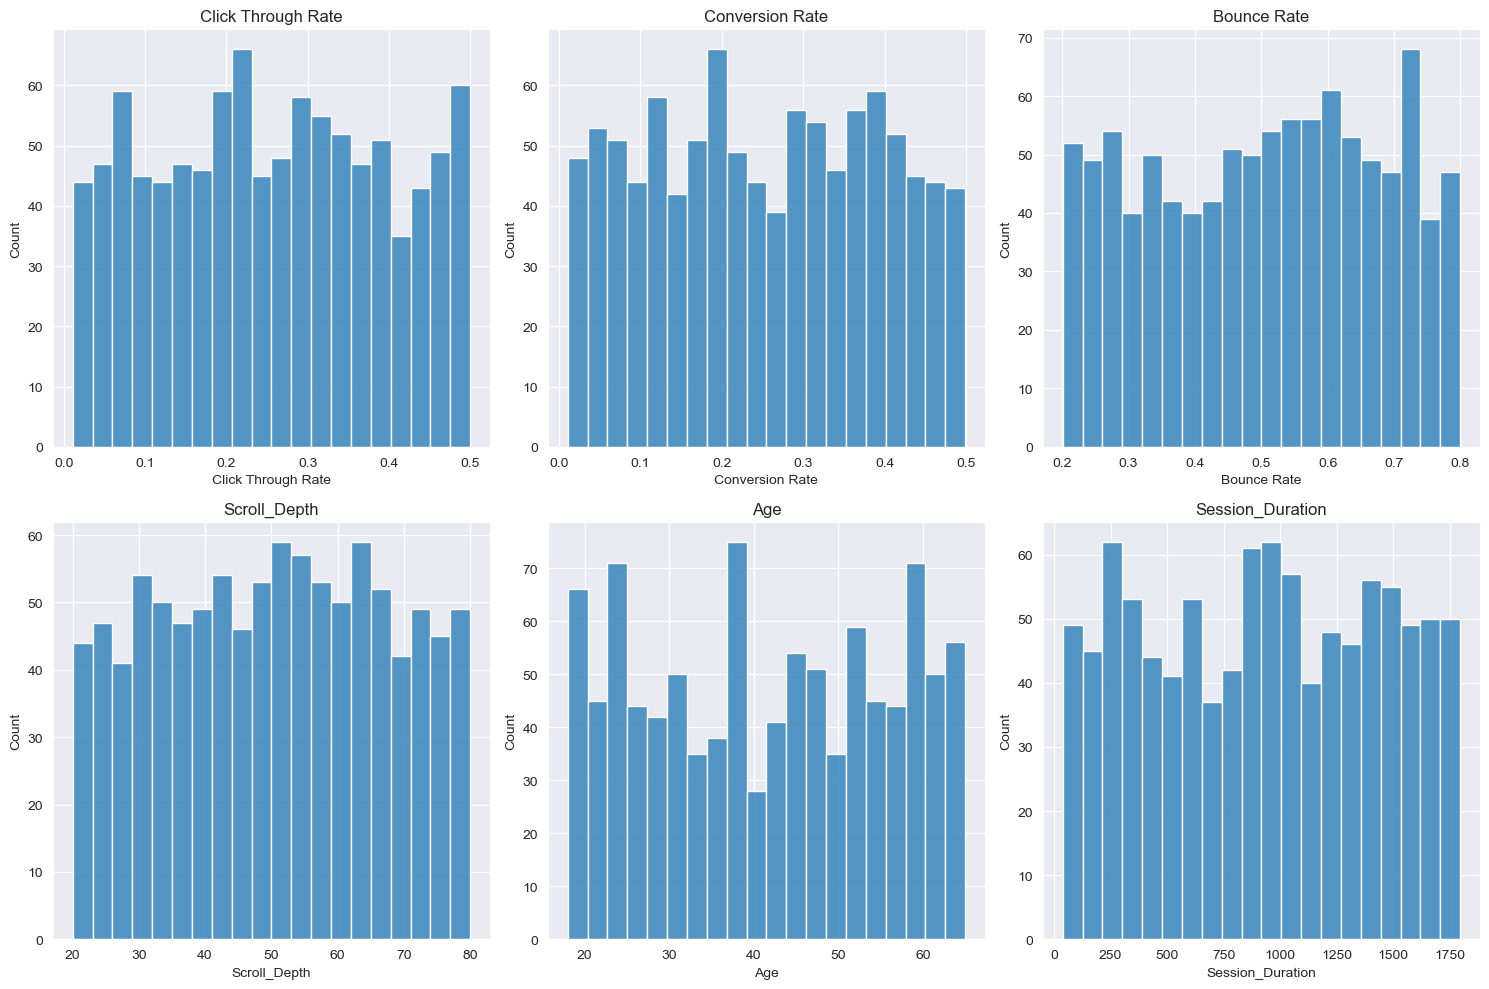

In [58]:
numeric_cols = data_df.select_dtypes(exclude='object').columns
num_plots = len(numeric_cols)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    plt.sca(axes[i])
    plot_hist(col)
    axes[i].set_title(col)


plt.tight_layout()
plt.show()


In [62]:
dark_conversion_rate = data_df[data_df['Theme'] == 'Dark Theme']['Conversion Rate']
light_conversion_rate = data_df[data_df['Theme'] == 'Light Theme']['Conversion Rate']

t_stat,p_value = ttest_ind(dark_conversion_rate,light_conversion_rate)
t_stat,p_value

(-0.4744928265361651, 0.6352523154387317)

Hm P-value of 0.63 is alot greater than generally accepted alpha of 0.05.
So, we fail to reject null hypothesis.